In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\dell\Desktop\Insurance\insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### What is the average, minimum, and maximum age of the individuals in the dataset?

In [5]:
average_age = df['age'].mean()
min_age = df['age'].min()
max_age = df['age'].max()

average_age, min_age, 


(39.20702541106129, 18)

### BMI Analysis*: What is the average Body Mass Index (BMI) across all individuals, and how does it vary across different age groups?


In [6]:
average_bmi = df['bmi'].mean()

def age_group(age):
    if age < 20:
        return 'Under 20'
    elif 20 <= age <= 29:
        return '20-29'
    else:
        return '30 and above'

df['age_group'] = df['age'].apply(age_group)

average_bmi_by_age_group = df.groupby('age_group')['bmi'].mean()

average_bmi, average_bmi_by_age_group


(30.66339686098655,
 age_group
 20-29           29.786964
 30 and above    31.032769
 Under 20        29.971496
 Name: bmi, dtype: float64)

### What is the distribution of insurance charges? Can you plot a histogram to visualize this?

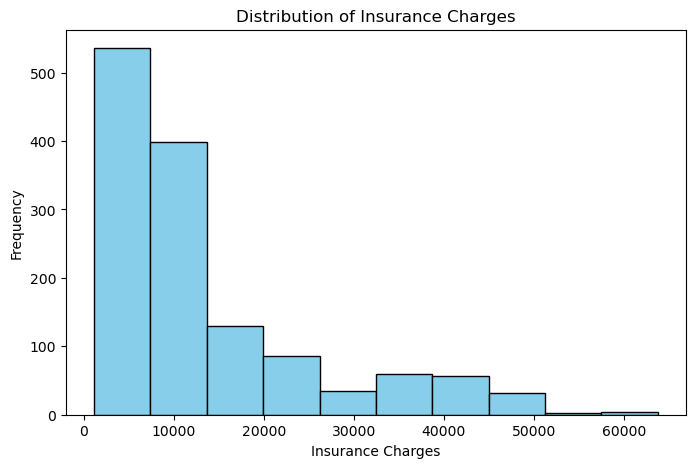

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(df['charges'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Insurance Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Insurance Charges')
plt.show()

#### Is there a correlation between age and insurance charges?

In [8]:
correlation = df['age'].corr(df['charges'])
correlation

0.2990081933306477

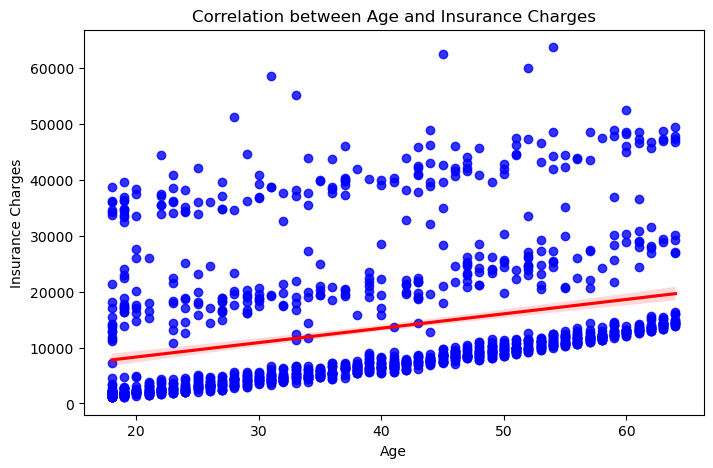

In [9]:
plt.figure(figsize=(8, 5))
sns.regplot(x='age', y='charges', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.title('Correlation between Age and Insurance Charges')
plt.show()

#### Is there a correlation between BMI and insurance charges? Can you visualize this relationship?

Correlation between BMI and insurance charges: 0.20


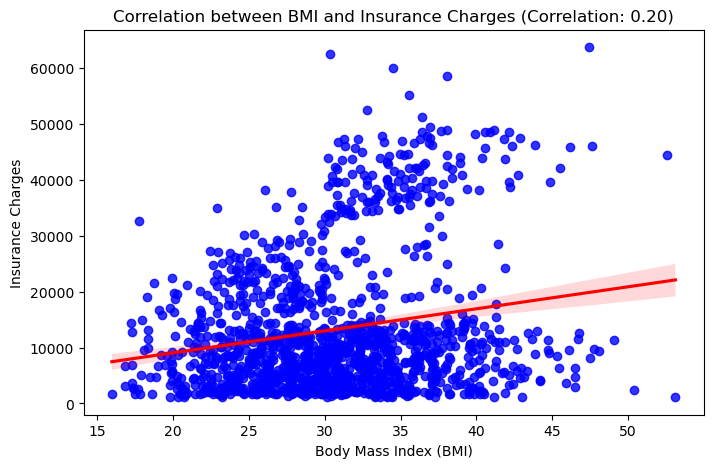

In [10]:
correlation = df['bmi'].corr(df['charges'])
print(f"Correlation between BMI and insurance charges: {correlation:.2f}")

plt.figure(figsize=(8, 5))
sns.regplot(x='bmi', y='charges', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Insurance Charges')
plt.title(f'Correlation between BMI and Insurance Charges (Correlation: {correlation:.2f})')
plt.show()


#### What is the average insurance charge for males vs. females?


In [11]:
average_charges = df.groupby('sex')['charges'].mean()

average_charges


sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

#### What is the average insurance charge for smokers compared to non-smokers?

In [12]:
average_charges_smoker = df.groupby('smoker')['charges'].mean()

average_charges_smoker

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

 #### Does the number of children an individual has correlate with their insurance charges?

In [13]:
correlation = df['children'].corr(df['charges'])
print(f"Correlation between number of children and insurance charges: {correlation:.2f}")

Correlation between number of children and insurance charges: 0.07


#### How do insurance charges vary by region? Which region has the highest average charge?


In [14]:
average_charges_by_region = df.groupby('region')['charges'].mean()

highest_average_charge_region = average_charges_by_region.idxmax()
highest_average_charge_value = average_charges_by_region.max()

print("Average insurance charges by region:")
print(average_charges_by_region)
print(f"\nRegion with the highest average charge: {highest_average_charge_region} (${highest_average_charge_value:.2f})")

Average insurance charges by region:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

Region with the highest average charge: southeast ($14735.41)


#### what is the average insurance charge for smokers and non-smokers in each region?


In [15]:
average_charges_region_smoker = df.groupby(['region', 'smoker'])['charges'].mean().unstack()

print("Average insurance charges for smokers and non-smokers in each region:")
print(average_charges_region_smoker)


Average insurance charges for smokers and non-smokers in each region:
smoker              no           yes
region                              
northeast  9165.531672  29673.536473
northwest  8556.463715  30192.003182
southeast  8032.216309  34844.996824
southwest  8019.284513  32269.063494


#### What percentage of males and females are smokers?

In [16]:
total_counts = df.groupby('sex')['smoker'].count()
smoker_counts = df[df['smoker'] == 'yes'].groupby('sex')['smoker'].count()
percentage_smokers = (smoker_counts / total_counts) * 100

print("Percentage of smokers by gender:")
print(percentage_smokers)

Percentage of smokers by gender:
sex
female    17.371601
male      23.520710
Name: smoker, dtype: float64


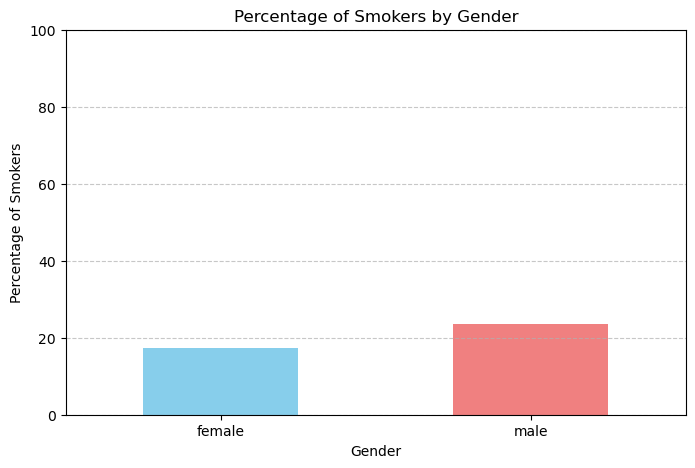

In [17]:
plt.figure(figsize=(8, 5))
percentage_smokers.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Percentage of Smokers by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Smokers')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Identify individuals with charges above a certain threshold (e.g., $20,000). What is their average BMI, age, and smoking status?


In [18]:

threshold = 20000

high_charge_individuals = df[df['charges'] > threshold]

average_bmi = high_charge_individuals['bmi'].mean()
average_age = high_charge_individuals['age'].mean()

smoker_status_counts = high_charge_individuals['smoker'].value_counts(normalize=True) * 100
print(f"Average BMI for individuals with charges above ${threshold}: {average_bmi:.2f}")
print(f"Average Age for individuals with charges above ${threshold}: {average_age:.2f}")
print("\nSmoking Status Distribution:")
print(smoker_status_counts)

Average BMI for individuals with charges above $20000: 32.11
Average Age for individuals with charges above $20000: 42.46

Smoking Status Distribution:
smoker
yes    77.655678
no     22.344322
Name: proportion, dtype: float64


### What is the distribution of the number of children? How many individuals have zero children, one child, etc.?


Distribution of the number of children:
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


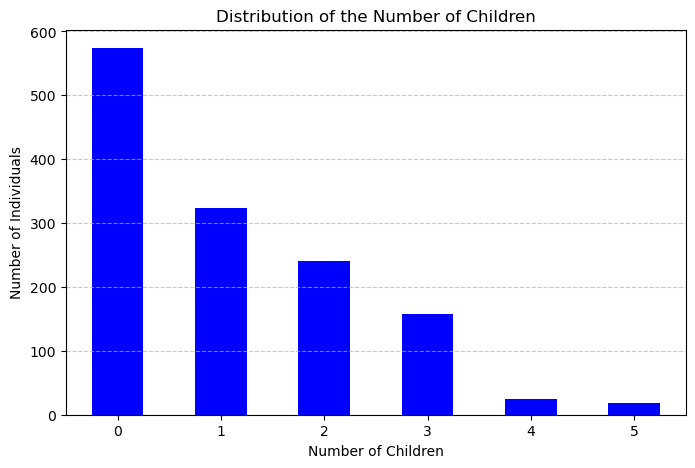

In [19]:
children_distribution = df['children'].value_counts().sort_index()

print("Distribution of the number of children:")
print(children_distribution)

plt.figure(figsize=(8, 5))
children_distribution.plot(kind='bar', color='blue')
plt.title('Distribution of the Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 14. *Age Group Analysis*: Can you categorize ages into groups (e.g., 18-30, 31-45, etc.) and find the average insurance charge for each age group?


C:\Users\dell\AppData\Local\Temp\ipykernel_7576\1472464164.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_charges_by_age_group = df.groupby('age_group')['charges'].mean()


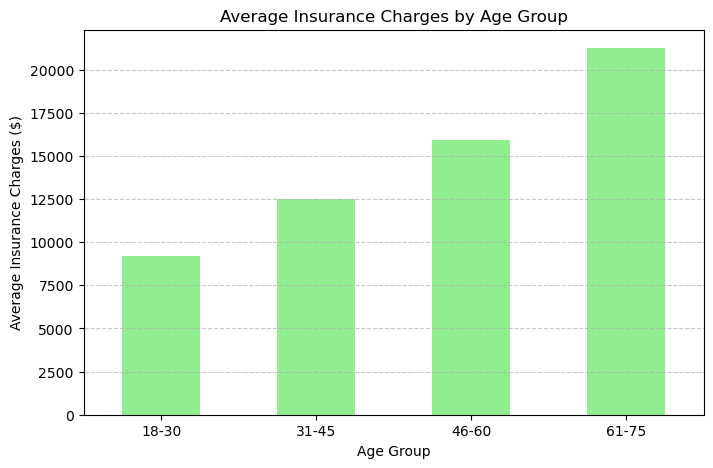

In [20]:
bins = [18, 30, 45, 60, 75]  # Adjust the bins as needed
labels = ['18-30', '31-45', '46-60', '61-75']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

average_charges_by_age_group = df.groupby('age_group')['charges'].mean()

plt.figure(figsize=(8, 5))
average_charges_by_age_group.plot(kind='bar', color='lightgreen')
plt.title('Average Insurance Charges by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Insurance Charges ($)')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 15. *Predictive Insights*: Using a simple linear regression, can age and BMI predict insurance charges?

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df[['age', 'bmi']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Coefficients: [223.79653146 330.79448868]
Intercept: -5571.083408548644
Mean Squared Error (MSE): 131440262.76073726
R-squared: 0.1533569292467798
